In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [29]:
df_init = pd.read_csv('weather_ts.csv')

In [30]:
df_init.head()

FID  number  station_nu           station_na  decilat  decilong  Jan  Feb  \
0    0     1.0     50434.0               Tulihe   50.483   121.683  5.1  4.0   
1    1     2.0     50527.0               Hailar   49.217   119.750  6.5  0.8   
2    2     3.0     50632.0               Boketu   48.767   121.917  3.1  1.2   
3    3     4.0     50727.0  Keerqingyouyiqianqi   47.167   119.950  6.6  3.3   
4    4     5.0     50915.0    Dongwuzhumuqingqi   45.517   116.967  0.0  2.1   

    Mar   Apr  ...   c_10  c_11  c_12  c_13  c_14  c_15  c_16  c_17  c_18  \
0   1.8  10.7  ...    214   189   204   219   214   213   208   202   213   
1   5.2  16.0  ...    187   177   186   187   185   186   186   183   193   
2   4.7   4.3  ...    217   188   214   222   223   213   223   201   218   
3  11.0  30.2  ...    220   206   209   220   218   217   223   200   222   
4   3.6   3.7  ...    174   172   188   193   173   176   156   192   167   

   c_19  
0   199  
1   195  
2   210  
3   212  
4   164  

[5 rows x 37 columns]

In [31]:
df_init.columns

Index(['FID', 'number', 'station_nu', 'station_na', 'decilat', 'decilong',
       'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec', 'c_1', 'c_2', 'c_3', 'c_4', 'c_5', 'c_6', 'c_7', 'c_8',
       'c_9', 'c_10', 'c_11', 'c_12', 'c_13', 'c_14', 'c_15', 'c_16', 'c_17',
       'c_18', 'c_19'],
      dtype='object')

In [32]:
df_init.dtypes

FID             int64
number        float64
station_nu    float64
station_na     object
decilat       float64
decilong      float64
Jan           float64
Feb           float64
Mar           float64
Apr           float64
May           float64
Jun           float64
Jul           float64
Aug           float64
Sep           float64
Oct           float64
Nov           float64
Dec           float64
c_1             int64
c_2             int64
c_3             int64
c_4             int64
c_5             int64
c_6             int64
c_7             int64
c_8             int64
c_9             int64
c_10            int64
c_11            int64
c_12            int64
c_13            int64
c_14            int64
c_15            int64
c_16            int64
c_17            int64
c_18            int64
c_19            int64
dtype: object

In [33]:
df_init

FID  number  station_nu           station_na  decilat  decilong  Jan  Feb  \
0     0     1.0     50434.0               Tulihe   50.483   121.683  5.1  4.0   
1     1     2.0     50527.0               Hailar   49.217   119.750  6.5  0.8   
2     2     3.0     50632.0               Boketu   48.767   121.917  3.1  1.2   
3     3     4.0     50727.0  Keerqingyouyiqianqi   47.167   119.950  6.6  3.3   
4     4     5.0     50915.0    Dongwuzhumuqingqi   45.517   116.967  0.0  2.1   
5     5     8.0     53192.0              Abagaqi   44.017   114.950  0.2  0.4   
6     6    16.0     54012.0          Wanggaimiao   44.583   117.600  0.0  1.9   
7     7    17.0     54026.0                Lubei   44.567   120.900  0.0  1.5   
8     8    18.0     54027.0              Lindong   43.983   119.400  0.0  1.2   
9     9    19.0     54102.0           Xilinhaote   43.950   116.067  0.8  1.7   
10   10    34.0     54026.0             Jarud Qi   44.204   120.324  0.0  0.0   
11   11     6.0     52495.0          Bayanmaodao   40.750   104.500  0.0  0.0   
12   12     7.0     53068.0          Erlianhaote   43.650   111.967  0.3  1.7   
13   13     9.0     53276.0             Zhourihe   42.400   112.900  0.9  1.0   
14   14    10.0     53336.0             Hailiutu   41.567   108.517  0.1  0.0   
15   15    11.0     53352.0          Beilingmiao   41.700   110.433  1.0  0.3   
16   16    12.0     53319.0                Huade   41.900   114.000  1.0  0.4   
17   17    13.0     53463.0               Hohhot   40.817   111.683  0.0  0.0   
18   18    20.0     54115.0                Linxi   43.600   118.067  0.0  0.0   
19   19    21.0     54135.0             Tongliao   43.600   122.267  0.0  0.0   
20   20    22.0     54208.0               Duolun   42.183   116.467  0.2  0.7   
21   21    23.0     54218.0              Chifeng   42.267   118.967  1.6  0.0   
22   22    30.0     60001.0                Wudan   42.933   119.017  0.0  0.0   
23   23    31.0     60003.0                Kulun   42.717   121.076  0.0  0.0   
24   24    32.0     60004.0               Naiman   42.833   120.716  0.0  0.0   
25   25    33.0     60005.0               Ganjig   42.950   122.350  0.0  0.0   
26   26    14.0     53502.0             Jilantai   39.768   105.759  0.2  0.0   
27   27    15.0     53529.0            Ketuokeqi   39.093   107.972  0.0  0.0   
28   28    24.0     53723.0               Yanchi   37.767   107.402  0.0  0.0   
29   29    25.0     53614.0             Yinchuan   38.456   106.260  0.0  0.0   
30   30    26.0     53646.0                Yulin   38.284   109.776  0.0  0.0   
31   31    27.0     53602.0            Bayan Hot   38.824   105.674  0.0  0.0   
32   32    28.0     53705.0            Zhongning   37.477   105.702  0.0  0.0   
33   33    29.0     60002.0               Wushen   38.588   108.837  0.0  0.0   
34   34     0.0         0.0                         0.000     0.000  0.0  0.0   
35   35     0.0         0.0                         0.000     0.000  0.0  0.0   
36   36     0.0         0.0                         0.000     0.000  0.0  0.0   
37   37     0.0         0.0                         0.000     0.000  0.0  0.0   
38   38     0.0         0.0                         0.000     0.000  0.0  0.0   
39   39     0.0         0.0                         0.000     0.000  0.0  0.0   

     Mar   Apr  ...   c_10  c_11  c_12  c_13  c_14  c_15  c_16  c_17  c_18  \
0    1.8  10.7  ...    214   189   204   219   214   213   208   202   213   
1    5.2  16.0  ...    187   177   186   187   185   186   186   183   193   
2    4.7   4.3  ...    217   188   214   222   223   213   223   201   218   
3   11.0  30.2  ...    220   206   209   220   218   217   223   200   222   
4    3.6   3.7  ...    174   172   188   193   173   176   156   192   167   
5    8.1   2.8  ...    158   158   171   183   164   172   156   181   163   
6    6.7   1.3  ...    186   184   195   203   190   194   186   188   187   
7    5.8   2.2  ...    188   188   188   195   174   195  

# cleaning the data

In [34]:
# remove obsolete rows
df = df_init[df_init.number != 0.0]

In [35]:
# change datatypes accordingly
dtype_dict = {
    'number': int, 'station_nu': int,
    'c_1': float, 'c_2': float, 'c_3': float, 'c_4': float, 'c_5': float,
    'c_6': float, 'c_7': float, 'c_8': float, 'c_9': float, 'c_10': float,
    'c_11': float, 'c_12': float, 'c_13': float, 'c_14': float, 'c_15': float,
    'c_16': float, 'c_17': float, 'c_18': float, 'c_19': float,
}

df = df.astype(dtype_dict)

In [36]:
df.set_index('FID', inplace=True)

In [37]:
df.drop(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], axis='columns', inplace=True)

In [38]:
df.head(3)

number  station_nu station_na  decilat  decilong    c_1    c_2    c_3  \
FID                                                                          
0         1       50434     Tulihe   50.483   121.683  211.0  204.0  205.0   
1         2       50527     Hailar   49.217   119.750  193.0  190.0  194.0   
2         3       50632     Boketu   48.767   121.917  220.0  208.0  212.0   

       c_4    c_5  ...     c_10   c_11   c_12   c_13   c_14   c_15   c_16  \
FID                ...                                                      
0    206.0  206.0  ...    214.0  189.0  204.0  219.0  214.0  213.0  208.0   
1    187.0  187.0  ...    187.0  177.0  186.0  187.0  185.0  186.0  186.0   
2    209.0  210.0  ...    217.0  188.0  214.0  222.0  223.0  213.0  223.0   

      c_17   c_18   c_19  
FID                       
0    202.0  213.0  199.0  
1    183.0  193.0  195.0  
2    201.0  218.0  210.0  

[3 rows x 24 columns]

In [39]:
def convert_to_NDVI(dn):
    """Converts a DN (digital number) that was altered for distribution by NASA back to a valid NDVI."""
    ndvi = (dn - 128) * 0.008
    return ndvi

In [40]:
ndvi_columns = ['c_1', 'c_2', 'c_3', 'c_4', 'c_5', 'c_6', 'c_7', 'c_8', 'c_9', 'c_10',
                'c_11', 'c_12', 'c_13', 'c_14', 'c_15', 'c_16', 'c_17', 'c_18', 'c_19']

In [41]:
df[ndvi_columns] = df[ndvi_columns].apply(convert_to_NDVI)

In [42]:
df

number  station_nu           station_na  decilat  decilong    c_1    c_2  \
FID                                                                             
0         1       50434               Tulihe   50.483   121.683  0.664  0.608   
1         2       50527               Hailar   49.217   119.750  0.520  0.496   
2         3       50632               Boketu   48.767   121.917  0.736  0.640   
3         4       50727  Keerqingyouyiqianqi   47.167   119.950  0.752  0.680   
4         5       50915    Dongwuzhumuqingqi   45.517   116.967  0.288  0.224   
5         8       53192              Abagaqi   44.017   114.950  0.288  0.296   
6        16       54012          Wanggaimiao   44.583   117.600  0.488  0.432   
7        17       54026                Lubei   44.567   120.900  0.376  0.464   
8        18       54027              Lindong   43.983   119.400  0.456  0.432   
9        19       54102           Xilinhaote   43.950   116.067  0.384  0.392   
10       34       54026             Jarud Qi   44.204   120.324  0.376  0.400   
11        6       52495          Bayanmaodao   40.750   104.500  0.032  0.040   
12        7       53068          Erlianhaote   43.650   111.967  0.232  0.112   
13        9       53276             Zhourihe   42.400   112.900  0.168  0.176   
14       10       53336             Hailiutu   41.567   108.517  0.136  0.120   
15       11       53352          Beilingmiao   41.700   110.433  0.208  0.240   
16       12       53319                Huade   41.900   114.000  0.360  0.248   
17       13       53463               Hohhot   40.817   111.683  0.424  0.384   
18       20       54115                Linxi   43.600   118.067  0.392  0.432   
19       21       54135             Tongliao   43.600   122.267  0.448  0.496   
20       22       54208               Duolun   42.183   116.467  0.448  0.376   
21       23       54218              Chifeng   42.267   118.967  0.416  0.336   
22       30       60001                Wudan   42.933   119.017  0.440  0.368   
23       31       60003                Kulun   42.717   121.076  0.352  0.336   
24       32       60004               Naiman   42.833   120.716  0.384  0.416   
25       33       60005               Ganjig   42.950   122.350  0.408  0.480   
26       14       53502             Jilantai   39.768   105.759  0.016  0.016   
27       15       53529            Ketuokeqi   39.093   107.972  0.104  0.128   
28       24       53723               Yanchi   37.767   107.402  0.120  0.128   
29       25       53614             Yinchuan   38.456   106.260  0.480  0.528   
30       26       53646                Yulin   38.284   109.776  0.128  0.184   
31       27       53602            Bayan Hot   38.824   105.674  0.048  0.088   
32       28       53705            Zhongning   37.477   105.702  0.432  0.504   
33       29       60002               Wushen   38.588   108.837  0.176  0.160   

       c_3    c_4    c_5  ...     c_10   c_11   c_12   c_13   c_14   c_15  \
FID                       ...                                               
0    0.616  0.624  0.624  ...    0.688  0.488  0.608  0.728  0.688  0.680   
1    0.528  0.472  0.472  ...    0.472  0.392  0.464  0.472  0.456  0.464   
2    0.672  0.648  0.656  ...    0.712  0.480  0.688  0.752  0.760  0.680   
3    0.680  0.672  0.640  ...    0.736  0.624  0.648  0.736  0.720  0.712   
4    0.392  0.368  0.368  ...    0.368  0.352  0.480  0.520  0.360  0.384   
5    0.304  0.336  0.248  ...    0.240  0.240  0.344  0.440  0.288  0.352   
6    0.528  0.544  0.448  ...    0.464  0.448  0.536  0.600  0.496  0.528   
7    0.512  0.464  0.512  ...    0.480  0.480  0.480  0.536  0.368  0.536   
8    0.504  0.408  0.504  ...    0.472  0.448  0.472  0.512  0.512  0.488   
9    0.344  0.320  0.376  ...    0.352  0.376  0.472  0.488  0.360  0.464   
10   0.480  0.392  0.432  ...    0.392  0.336  0.408  0.464  0.296  0.384   
11   0.080  0.040  0.032  ...    0.048  0.048  0.056  0.064  0.032  0.056   
12   0.128

# Visualizing trends

To see the development of NDVI values over time, I'll plot them out.

In [43]:
plt.rcParams['figure.figsize'] = (16,12)

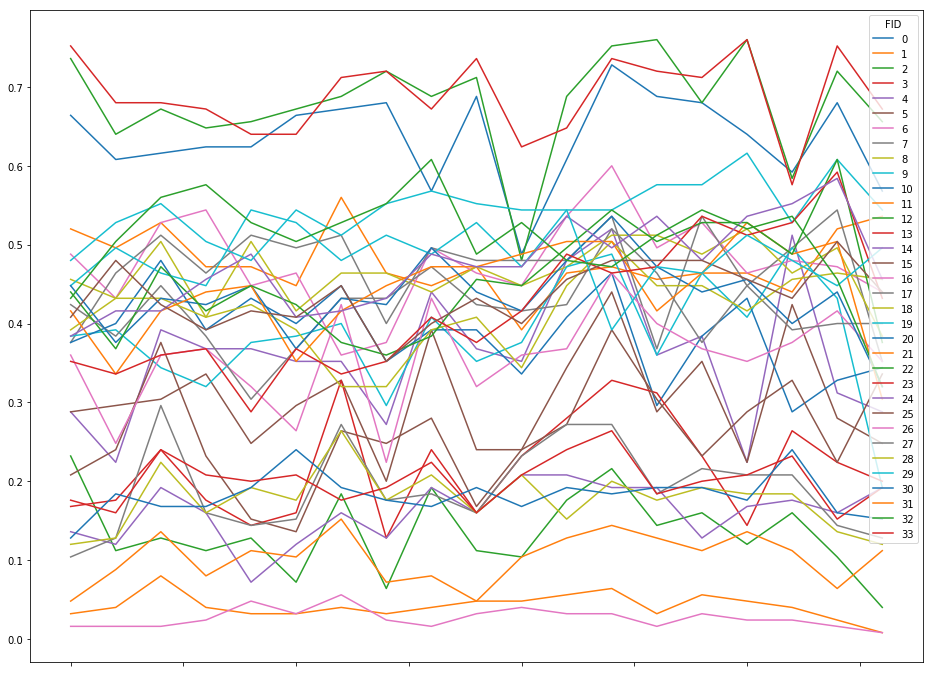

In [44]:
df[ndvi_columns].T.plot()

In [45]:
df[ndvi_columns].T

FID      0      1      2      3      4      5      6      7      8      9   \
c_1   0.664  0.520  0.736  0.752  0.288  0.288  0.488  0.376  0.456  0.384   
c_2   0.608  0.496  0.640  0.680  0.224  0.296  0.432  0.464  0.432  0.392   
c_3   0.616  0.528  0.672  0.680  0.392  0.304  0.528  0.512  0.504  0.344   
c_4   0.624  0.472  0.648  0.672  0.368  0.336  0.544  0.464  0.408  0.320   
c_5   0.624  0.472  0.656  0.640  0.368  0.248  0.448  0.512  0.504  0.376   
c_6   0.664  0.448  0.672  0.640  0.352  0.296  0.464  0.496  0.416  0.384   
c_7   0.672  0.560  0.688  0.712  0.352  0.328  0.360  0.512  0.464  0.400   
c_8   0.680  0.464  0.720  0.720  0.272  0.200  0.376  0.400  0.464  0.296   
c_9   0.568  0.448  0.688  0.672  0.440  0.392  0.496  0.496  0.440  0.408   
c_10  0.688  0.472  0.712  0.736  0.368  0.240  0.464  0.480  0.472  0.352   
c_11  0.488  0.392  0.480  0.624  0.352  0.240  0.448  0.480  0.448  0.376   
c_12  0.608  0.464  0.688  0.648  0.480  0.344  0.536  0.480  0.472  0.472   
c_13  0.728  0.472  0.752  0.736  0.520  0.440  0.600  0.536  0.512  0.488   
c_14  0.688  0.456  0.760  0.720  0.360  0.288  0.496  0.368  0.512  0.360   
c_15  0.680  0.464  0.680  0.712  0.384  0.352  0.528  0.536  0.488  0.464   
c_16  0.640  0.464  0.760  0.760  0.224  0.224  0.464  0.448  0.520  0.408   
c_17  0.592  0.440  0.584  0.576  0.512  0.424  0.480  0.496  0.464  0.496   
c_18  0.680  0.520  0.720  0.752  0.312  0.280  0.472  0.544  0.496  0.432   
c_19  0.568  0.536  0.656  0.672  0.288  0.248  0.440  0.352  0.384  0.192   

FID   ...       24     25     26     27     28     29     30     31     32  \
c_1   ...    0.384  0.408  0.016  0.104  0.120  0.480  0.128  0.048  0.432   
c_2   ...    0.416  0.480  0.016  0.128  0.128  0.528  0.184  0.088  0.504   
c_3   ...    0.416  0.424  0.016  0.296  0.224  0.552  0.168  0.136  0.560   
c_4   ...    0.456  0.392  0.024  0.160  0.160  0.504  0.168  0.080  0.576   
c_5   ...    0.488  0.416  0.048  0.144  0.192  0.480  0.192  0.112  0.528   
c_6   ...    0.408  0.408  0.032  0.152  0.176  0.544  0.240  0.104  0.504   
c_7   ...    0.416  0.448  0.056  0.272  0.264  0.512  0.192  0.152  0.528   
c_8   ...    0.432  0.352  0.024  0.176  0.176  0.552  0.176  0.072  0.552   
c_9   ...    0.488  0.400  0.016  0.184  0.208  0.568  0.168  0.080  0.608   
c_10  ...    0.472  0.432  0.032  0.160  0.160  0.552  0.192  0.048  0.488   
c_11  ...    0.472  0.400  0.040  0.232  0.208  0.544  0.168  0.104  0.528   
c_12  ...    0.536  0.456  0.032  0.272  0.152  0.544  0.192  0.128  0.480   
c_13  ...    0.496  0.480  0.032  0.272  0.200  0.392  0.184  0.144  0.472   
c_14  ...    0.536  0.480  0.016  0.184  0.176  0.472  0.192  0.128  0.512   
c_15  ...    0.480  0.480  0.032  0.216  0.192  0.464  0.192  0.112  0.544   
c_16  ...    0.536  0.456  0.024  0.208  0.184  0.512  0.176  0.136  0.520   
c_17  ...    0.552  0.432  0.024  0.208  0.184  0.480  0.240  0.112  0.536   
c_18  ...    0.584  0.504  0.016  0.144  0.136  0.448  0.160  0.064  0.456   
c_19  ...    0.456  0.440  0.008  0.128  0.120  0.496  0.152  0.112  0.320   

FID      33  
c_1   0.176  
c_2   0.160  
c_3   0.240  
c_4   0.208  
c_5   0.200  
c_6   0.208  
c_7   0.176  
c_8   0.192  
c_9   0.224  
c_10  0.160  
c_11  0.208  
c_12  0.240  
c_13  0.264  
c_14  0.184  
c_15  0.200  
c_16  0.208  
c_17  0.232  
c_18  0.152  
c_19  0.192  

[19 rows x 34 columns]

## A single weather station

and it's trend slope

In [46]:
df[ndvi_columns].T.index

Index(['c_1', 'c_2', 'c_3', 'c_4', 'c_5', 'c_6', 'c_7', 'c_8', 'c_9', 'c_10',
       'c_11', 'c_12', 'c_13', 'c_14', 'c_15', 'c_16', 'c_17', 'c_18', 'c_19'],
      dtype='object')

In [47]:
len(list(range(1982,2001)))

19

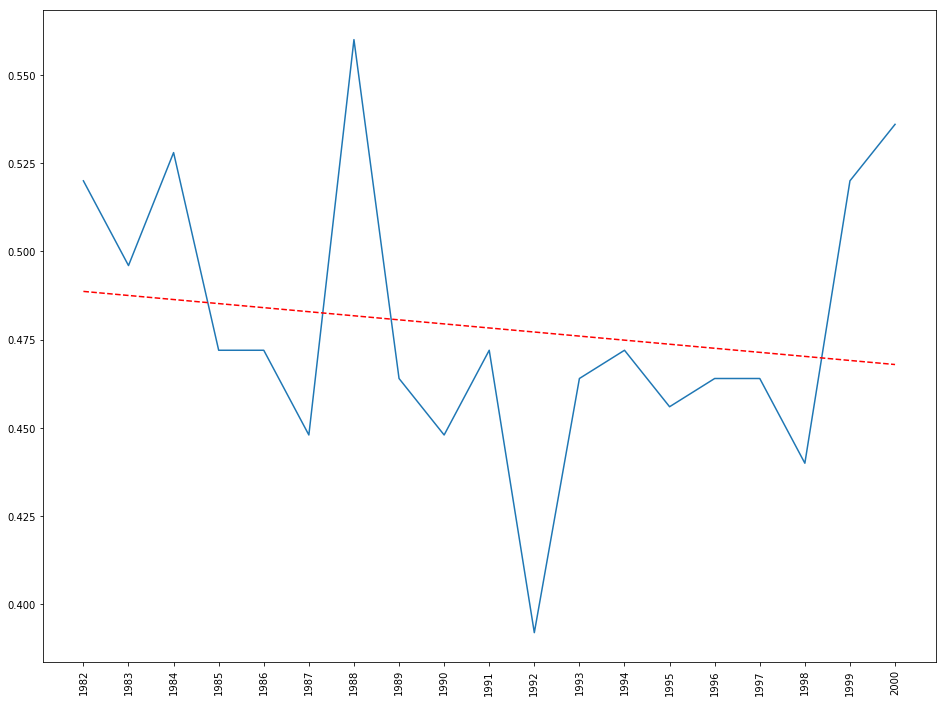

In [48]:
x = list(range(1982,2001))
y = df[ndvi_columns].T[1]  # as an example taking station #1
plt.plot(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xticks(list(range(1982,2001)), rotation=90)

plt.show()

In [49]:
print(np.poly1d(p))

 
-0.001151 x + 2.77


In [50]:
k = p[1]  # the slope

In [51]:
k

-0.0011508771929824876

In [52]:
z = np.polyfit(x, y, 1, full=True)  # adds also errors etc.

In [53]:
z

(array([-1.15087719e-03,  2.76971228e+00]),
 array([0.02773513]),
 2,
 array([1.41421222, 0.00194524]),
 4.218847493575595e-15)

# Calculating slopes for each station

for Task 1 and Task 2

In [54]:
x = list(range(1982,2001))
y = df[ndvi_columns].T[1]  # as an example taking station #1
z = np.polyfit(x, y, 1)
k = z[0]

In [55]:
slope_df = df[ndvi_columns].T.apply(lambda y: np.polyfit(list(range(1982,2001)), y, 1)).T

In [56]:
slope_df = slope_df.rename(index=str, columns={0: "slope", 1: "intercept"})

In [57]:
slope_df

slope  intercept
FID                     
0   -0.000070   0.775509
1   -0.001151   2.769712
2    0.000646  -0.605839
3    0.000379  -0.064800
4    0.002849  -5.311761
5    0.001123  -1.931930
6    0.001039  -1.590793
7    0.000070   0.331439
8    0.001277  -2.076786
9    0.001951  -3.497670
10  -0.004421   9.188842
11  -0.000575   1.187382
12  -0.001474   3.068842
13   0.003495  -6.740337
14   0.002807  -5.427509
15   0.004365  -8.431593
16   0.004225  -8.054470
17   0.001474  -2.517684
18   0.003775  -7.100898
19   0.006681 -12.777909
20   0.000084   0.266442
21   0.003677  -6.878344
22   0.006470 -12.426119
23   0.012505 -24.477768
24   0.007593 -14.642681
25   0.003214  -5.962933
26  -0.000337   0.697179
27   0.001305  -2.407200
28  -0.000547   1.266653
29  -0.003018   6.514456
30   0.000688  -1.186933
31   0.001333  -2.551509
32  -0.003818   8.108519
33   0.000477  -0.748828

## Add the weather station names

for easier interpretation

In [58]:
slope_df.index = df.station_na

In [59]:
slope_df

slope  intercept
station_na                              
Tulihe              -0.000070   0.775509
Hailar              -0.001151   2.769712
Boketu               0.000646  -0.605839
Keerqingyouyiqianqi  0.000379  -0.064800
Dongwuzhumuqingqi    0.002849  -5.311761
Abagaqi              0.001123  -1.931930
Wanggaimiao          0.001039  -1.590793
Lubei                0.000070   0.331439
Lindong              0.001277  -2.076786
Xilinhaote           0.001951  -3.497670
Jarud Qi            -0.004421   9.188842
Bayanmaodao         -0.000575   1.187382
Erlianhaote         -0.001474   3.068842
Zhourihe             0.003495  -6.740337
Hailiutu             0.002807  -5.427509
Beilingmiao          0.004365  -8.431593
Huade                0.004225  -8.054470
Hohhot               0.001474  -2.517684
Linxi                0.003775  -7.100898
Tongliao             0.006681 -12.777909
Duolun               0.000084   0.266442
Chifeng              0.003677  -6.878344
Wudan                0.006470 -12.426119
Kulun                0.012505 -24.477768
Naiman               0.007593 -14.642681
Ganjig               0.003214  -5.962933
Jilantai            -0.000337   0.697179
Ketuokeqi            0.001305  -2.407200
Yanchi              -0.000547   1.266653
Yinchuan            -0.003018   6.514456
Yulin                0.000688  -1.186933
Bayan Hot            0.001333  -2.551509
Zhongning           -0.003818   8.108519
Wushen               0.000477  -0.748828

In [60]:
# check out which one has the steepest (upwards) slope
slope_df[slope_df.slope == slope_df.slope.max()]

slope  intercept
station_na                     
Kulun       0.012505 -24.477768

In [61]:
slope_df.loc['Kulun']

slope         0.012505
intercept   -24.477768
Name: Kulun, dtype: float64

In [62]:
# check out which one has the steepest (downwards) slope
slope_df[slope_df.slope == slope_df.slope.min()]

slope  intercept
station_na                     
Jarud Qi   -0.004421   9.188842

In [63]:
slope_df.loc['Jarud Qi']

slope       -0.004421
intercept    9.188842
Name: Jarud Qi, dtype: float64

# Task 1: Create a bargraph for the slopes

<BarContainer object of 34 artists>

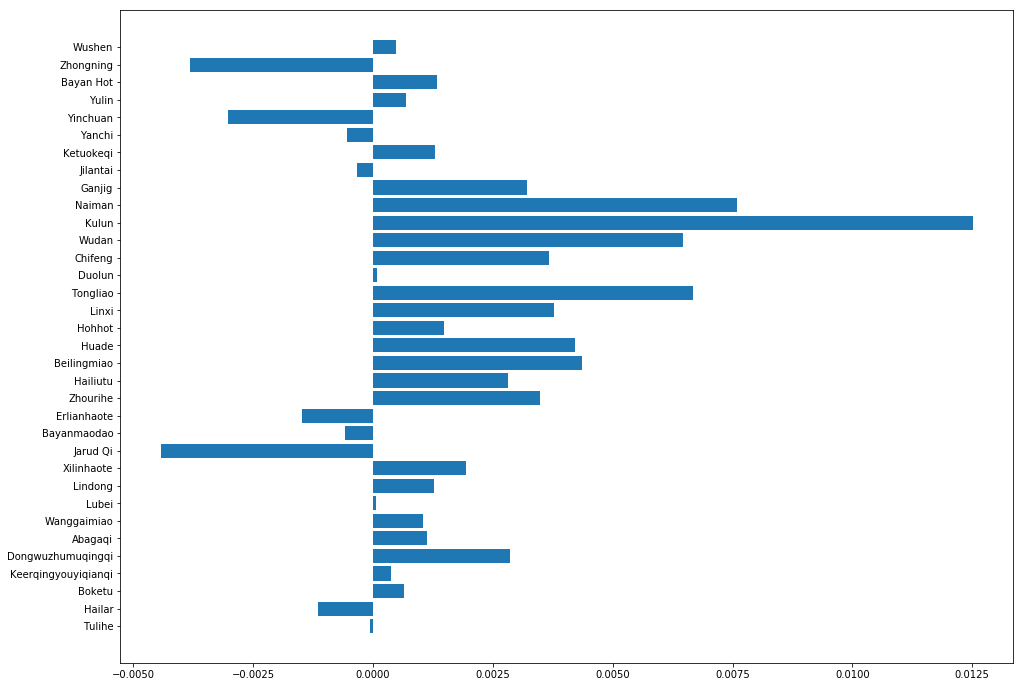

In [64]:
plt.barh(y=slope_df.index, width=slope_df.slope)

In [65]:
# plotting the stations with NDVI decrease in red and NDVI increase in green
colors = ['r' if x < 0 else 'g' for x in slope_df.slope]

<BarContainer object of 34 artists>

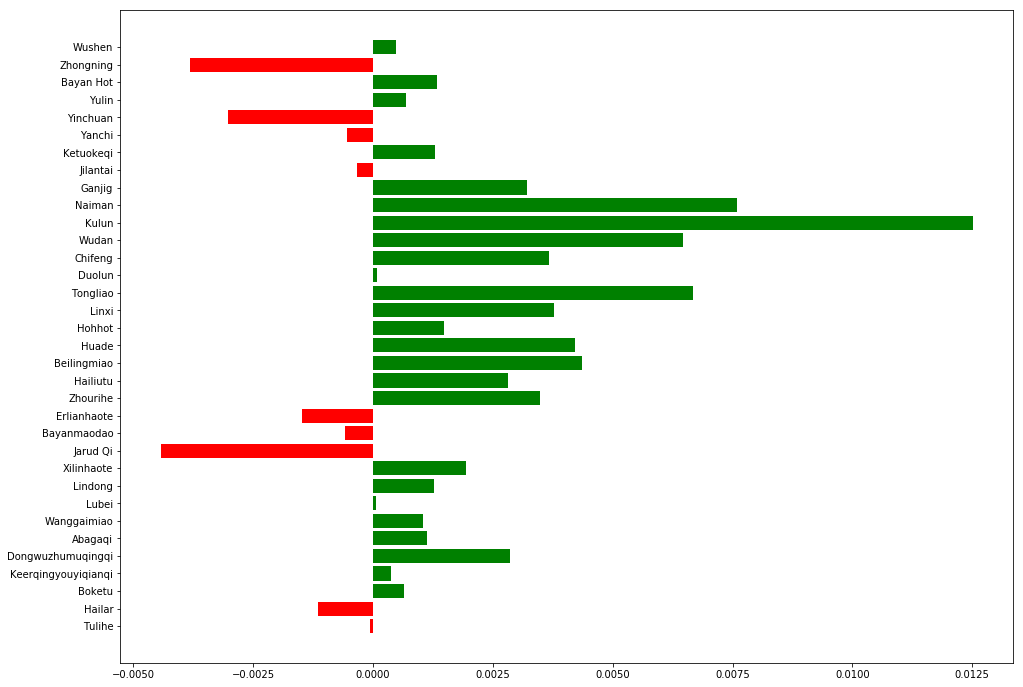

In [66]:
plt.barh(y=slope_df.index, width=slope_df.slope, color=colors)

# TODO: save this plot!!!!

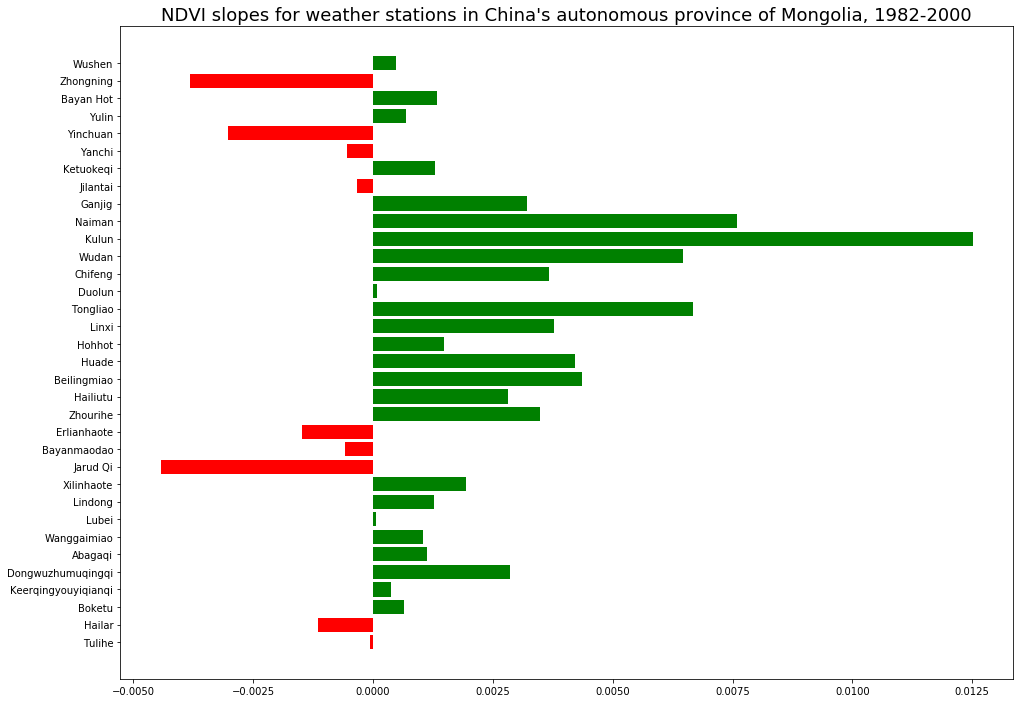

In [67]:
# save it to file
fig, ax = plt.subplots()
ax.barh(y=slope_df.index, width=slope_df.slope, color=colors)
ax.set_title("NDVI slopes for weather stations in China's autonomous province of Mongolia, 1982-2000", fontsize=18)
plt.savefig("ndvi_slopes.png")

# Task 2: Linear trend time series for highest positive trend station

In [68]:
slope_df

slope  intercept
station_na                              
Tulihe              -0.000070   0.775509
Hailar              -0.001151   2.769712
Boketu               0.000646  -0.605839
Keerqingyouyiqianqi  0.000379  -0.064800
Dongwuzhumuqingqi    0.002849  -5.311761
Abagaqi              0.001123  -1.931930
Wanggaimiao          0.001039  -1.590793
Lubei                0.000070   0.331439
Lindong              0.001277  -2.076786
Xilinhaote           0.001951  -3.497670
Jarud Qi            -0.004421   9.188842
Bayanmaodao         -0.000575   1.187382
Erlianhaote         -0.001474   3.068842
Zhourihe             0.003495  -6.740337
Hailiutu             0.002807  -5.427509
Beilingmiao          0.004365  -8.431593
Huade                0.004225  -8.054470
Hohhot               0.001474  -2.517684
Linxi                0.003775  -7.100898
Tongliao             0.006681 -12.777909
Duolun               0.000084   0.266442
Chifeng              0.003677  -6.878344
Wudan                0.006470 -12.426119
Kulun                0.012505 -24.477768
Naiman               0.007593 -14.642681
Ganjig               0.003214  -5.962933
Jilantai            -0.000337   0.697179
Ketuokeqi            0.001305  -2.407200
Yanchi              -0.000547   1.266653
Yinchuan            -0.003018   6.514456
Yulin                0.000688  -1.186933
Bayan Hot            0.001333  -2.551509
Zhongning           -0.003818   8.108519
Wushen               0.000477  -0.748828

In [69]:
station_df = df[ndvi_columns].T


In [70]:
station_df.head(2)

FID     0      1      2      3      4      5      6      7      8      9   \
c_1  0.664  0.520  0.736  0.752  0.288  0.288  0.488  0.376  0.456  0.384   
c_2  0.608  0.496  0.640  0.680  0.224  0.296  0.432  0.464  0.432  0.392   

FID  ...       24     25     26     27     28     29     30     31     32  \
c_1  ...    0.384  0.408  0.016  0.104  0.120  0.480  0.128  0.048  0.432   
c_2  ...    0.416  0.480  0.016  0.128  0.128  0.528  0.184  0.088  0.504   

FID     33  
c_1  0.176  
c_2  0.160  

[2 rows x 34 columns]

In [71]:
station_df.index = list(range(1982, 2001))

In [72]:
station_df.index.names = ['year']
station_df.columns = df.station_na

In [73]:
station_df.head(2)

station_na  Tulihe  Hailar  Boketu  Keerqingyouyiqianqi  Dongwuzhumuqingqi  \
year                                                                         
1982         0.664   0.520   0.736                0.752              0.288   
1983         0.608   0.496   0.640                0.680              0.224   

station_na  Abagaqi  Wanggaimiao  Lubei  Lindong  Xilinhaote   ...    Naiman  \
year                                                           ...             
1982          0.288        0.488  0.376    0.456       0.384   ...     0.384   
1983          0.296        0.432  0.464    0.432       0.392   ...     0.416   

station_na  Ganjig  Jilantai  Ketuokeqi  Yanchi  Yinchuan  Yulin  Bayan Hot  \
year                                                                          
1982         0.408     0.016      0.104   0.120     0.480  0.128      0.048   
1983         0.480     0.016      0.128   0.128     0.528  0.184      0.088   

station_na  Zhongning  Wushen  
year                           
1982            0.432   0.176  
1983            0.504   0.160  

[2 rows x 34 columns]

In [74]:
station_df.Kulun

year
1982    0.352
1983    0.336
1984    0.360
1985    0.368
1986    0.288
1987    0.368
1988    0.336
1989    0.352
1990    0.408
1991    0.376
1992    0.416
1993    0.488
1994    0.464
1995    0.472
1996    0.536
1997    0.512
1998    0.528
1999    0.592
2000    0.432
Name: Kulun, dtype: float64

In [120]:
# assembling the data
x = station_df.index
y = station_df.Kulun  # station with the highest positive slope

In [121]:
coefficients, residuals, _, _, _  = np.polyfit(x, y, 1, full=True)
# NOTE: the last three values are 'rank', 'singular values' and 'conditioning threshold'
#       but we're not using them here.

In [122]:
trend_line_equation = np.poly1d(coefficients)

In [123]:
# TODO: this makes no sense and is doctored to have a proper value.
# figure out why the value at space [0] of the trend line equation is a couple decimals off what d should be (and negative)
d = abs(trend_line_equation[0] / 100)

In [124]:
d

0.24477768421052526

In [125]:
k = trend_line_equation[1]
k

0.012505263157894684

In [126]:
rmse = residuals[0]

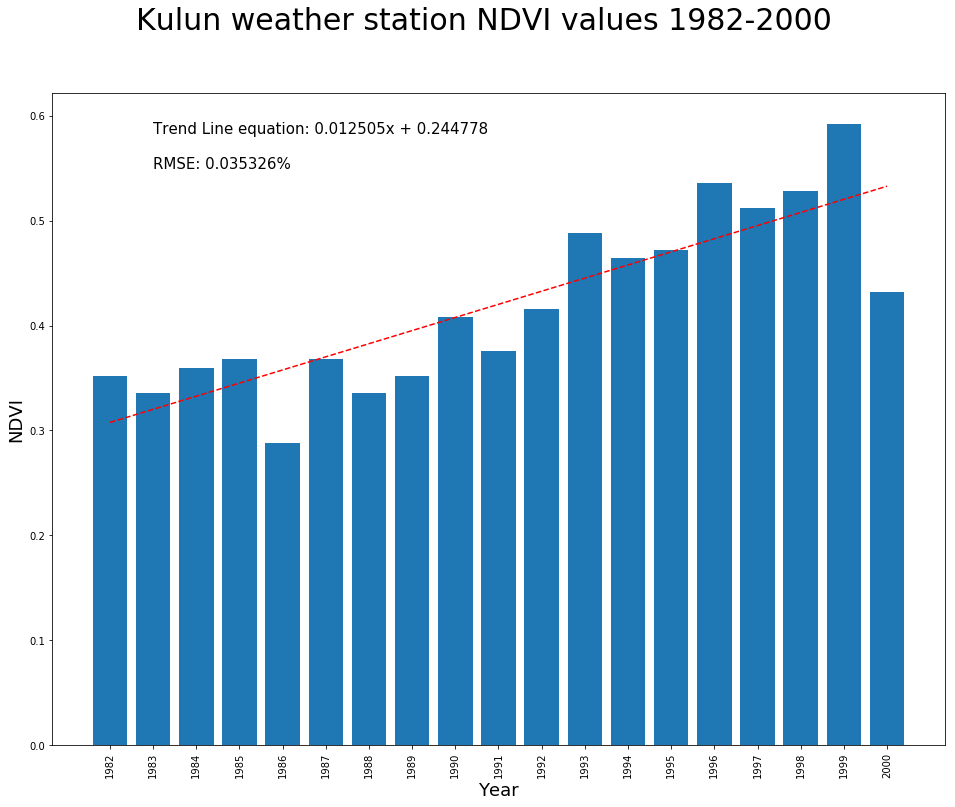

In [109]:
# plotting the time series NDVI data
fig = plt.figure()
#plt.plot(x, y)
plt.bar(x, height=y)
# creating the trend line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
# plotting the trend line
plt.plot(x,p(x),"r--")

# fixing up the figure for easier reading
plt.xticks(x, rotation=90)
plt.xlabel('Year', fontsize=18)
plt.ylabel('NDVI', fontsize=18)
fig.suptitle('Kulun weather station NDVI values 1982-2000', fontsize=30)
# interesting that the x and y are related to the plot values...
plt.text(x=1983, y=0.55, s="Trend Line equation: {0:f}x + {1:f}\n\nRMSE: {2:f}%".format(k, d, rmse), fontsize=15)

plt.show()

In [115]:
r_df = station_df.reset_index()

In [116]:
r_df.head()

station_na  year  Tulihe  Hailar  Boketu  Keerqingyouyiqianqi  \
0           1982   0.664   0.520   0.736                0.752   
1           1983   0.608   0.496   0.640                0.680   
2           1984   0.616   0.528   0.672                0.680   
3           1985   0.624   0.472   0.648                0.672   
4           1986   0.624   0.472   0.656                0.640   

station_na  Dongwuzhumuqingqi  Abagaqi  Wanggaimiao  Lubei  Lindong   ...    \
0                       0.288    0.288        0.488  0.376    0.456   ...     
1                       0.224    0.296        0.432  0.464    0.432   ...     
2                       0.392    0.304        0.528  0.512    0.504   ...     
3                       0.368    0.336        0.544  0.464    0.408   ...     
4                       0.368    0.248        0.448  0.512    0.504   ...     

station_na  Naiman  Ganjig  Jilantai  Ketuokeqi  Yanchi  Yinchuan  Yulin  \
0            0.384   0.408     0.016      0.104   0.120     0.480  0.128   
1            0.416   0.480     0.016      0.128   0.128     0.528  0.184   
2            0.416   0.424     0.016      0.296   0.224     0.552  0.168   
3            0.456   0.392     0.024      0.160   0.160     0.504  0.168   
4            0.488   0.416     0.048      0.144   0.192     0.480  0.192   

station_na  Bayan Hot  Zhongning  Wushen  
0               0.048      0.432   0.176  
1               0.088      0.504   0.160  
2               0.136      0.560   0.240  
3               0.080      0.576   0.208  
4               0.112      0.528   0.200  

[5 rows x 35 columns]

In [127]:
#x = station_df.index
#y = station_df.Kulun
# creating the OLS regression fit
model = sm.formula.ols(formula='year ~ Kulun', data=r_df)
res = model.fit()
r2 = res.rsquared

In [128]:
print(r2, d, k)

0.7161759133964786 0.24477768421052526 0.012505263157894684


### Below the code to save the plot as a file

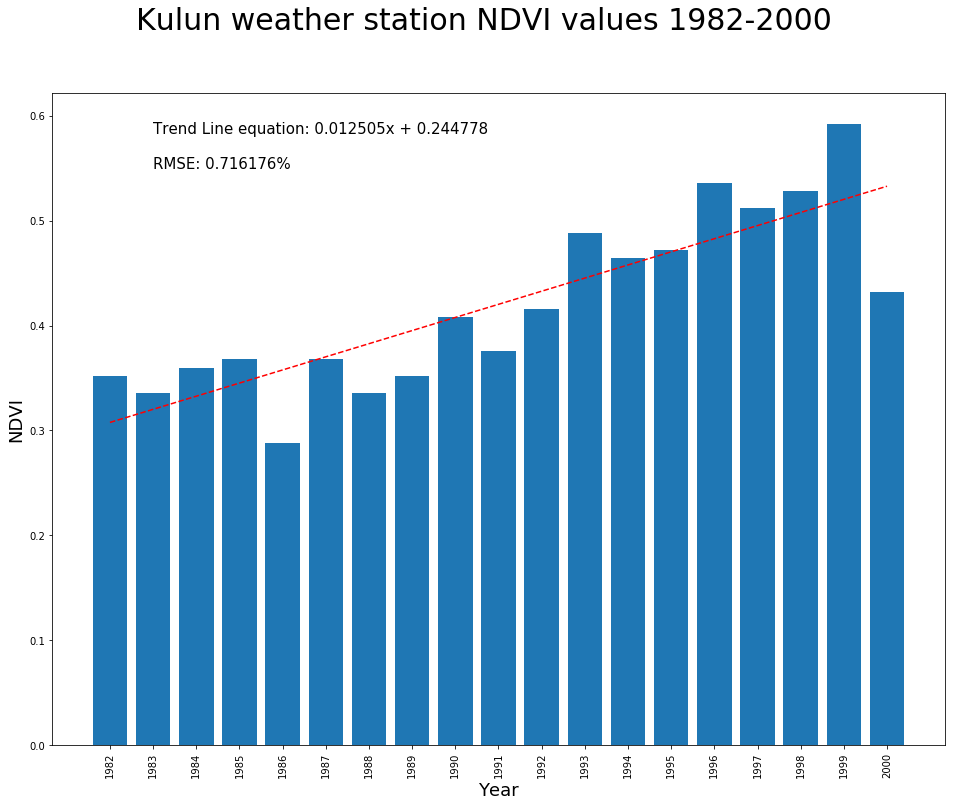

In [129]:
# plotting the time series NDVI data
fig, ax = plt.subplots()
#ax.plot(x, y)
ax.bar(x, height=y)
# creating the trend line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
# plotting the trend line
ax.plot(x,p(x),"r--")

# fixing up the figure for easier reading
plt.xticks(x, rotation=90)
plt.xlabel('Year', fontsize=18)
plt.ylabel('NDVI', fontsize=18)
fig.suptitle('Kulun weather station NDVI values 1982-2000', fontsize=30)
# interesting that the x and y are related to the plot values...
plt.text(x=1983, y=0.55, s="Trend Line equation: {0:f}x + {1:f}\n\nRMSE: {2:f}%".format(k, d, r2), fontsize=15)

plt.savefig("kulun.png")

# QUESTION: What land cover type surrounds Kulun weather station?

# Task 3: What is the highest positive gain value of NDVI?

The highest NDVI gain value over the selected 19 year-period lies with Kulun weather station at `0.012505263157894684`

In [81]:
slope_df.slope.max()

0.012505263157894684

In [82]:
slope_df[slope_df.slope == slope_df.slope.max()]

slope  intercept
station_na                     
Kulun       0.012505 -24.477768

This means that the area surrounding Kulun weather station had the highest increase in plant growth over the selected time period.

# Joining the info for better reusable output

In [83]:
new_df = df.join(slope_df, on='station_na')

In [84]:
new_df.head()

number  station_nu           station_na  decilat  decilong    c_1    c_2  \
FID                                                                             
0         1       50434               Tulihe   50.483   121.683  0.664  0.608   
1         2       50527               Hailar   49.217   119.750  0.520  0.496   
2         3       50632               Boketu   48.767   121.917  0.736  0.640   
3         4       50727  Keerqingyouyiqianqi   47.167   119.950  0.752  0.680   
4         5       50915    Dongwuzhumuqingqi   45.517   116.967  0.288  0.224   

       c_3    c_4    c_5    ...       c_12   c_13   c_14   c_15   c_16   c_17  \
FID                         ...                                                 
0    0.616  0.624  0.624    ...      0.608  0.728  0.688  0.680  0.640  0.592   
1    0.528  0.472  0.472    ...      0.464  0.472  0.456  0.464  0.464  0.440   
2    0.672  0.648  0.656    ...      0.688  0.752  0.760  0.680  0.760  0.584   
3    0.680  0.672  0.640    ...      0.648  0.736  0.720  0.712  0.760  0.576   
4    0.392  0.368  0.368    ...      0.480  0.520  0.360  0.384  0.224  0.512   

      c_18   c_19     slope  intercept  
FID                                     
0    0.680  0.568 -0.000070   0.775509  
1    0.520  0.536 -0.001151   2.769712  
2    0.720  0.656  0.000646  -0.605839  
3    0.752  0.672  0.000379  -0.064800  
4    0.312  0.288  0.002849  -5.311761  

[5 rows x 26 columns]

In [85]:
station_df.head()

station_na  Tulihe  Hailar  Boketu  Keerqingyouyiqianqi  Dongwuzhumuqingqi  \
year                                                                         
1982         0.664   0.520   0.736                0.752              0.288   
1983         0.608   0.496   0.640                0.680              0.224   
1984         0.616   0.528   0.672                0.680              0.392   
1985         0.624   0.472   0.648                0.672              0.368   
1986         0.624   0.472   0.656                0.640              0.368   

station_na  Abagaqi  Wanggaimiao  Lubei  Lindong  Xilinhaote   ...    Naiman  \
year                                                           ...             
1982          0.288        0.488  0.376    0.456       0.384   ...     0.384   
1983          0.296        0.432  0.464    0.432       0.392   ...     0.416   
1984          0.304        0.528  0.512    0.504       0.344   ...     0.416   
1985          0.336        0.544  0.464    0.408       0.320   ...     0.456   
1986          0.248        0.448  0.512    0.504       0.376   ...     0.488   

station_na  Ganjig  Jilantai  Ketuokeqi  Yanchi  Yinchuan  Yulin  Bayan Hot  \
year                                                                          
1982         0.408     0.016      0.104   0.120     0.480  0.128      0.048   
1983         0.480     0.016      0.128   0.128     0.528  0.184      0.088   
1984         0.424     0.016      0.296   0.224     0.552  0.168      0.136   
1985         0.392     0.024      0.160   0.160     0.504  0.168      0.080   
1986         0.416     0.048      0.144   0.192     0.480  0.192      0.112   

station_na  Zhongning  Wushen  
year                           
1982            0.432   0.176  
1983            0.504   0.160  
1984            0.560   0.240  
1985            0.576   0.208  
1986            0.528   0.200  

[5 rows x 34 columns]

In [86]:
station_df.T.head()

year                  1982   1983   1984   1985   1986   1987   1988   1989  \
station_na                                                                    
Tulihe               0.664  0.608  0.616  0.624  0.624  0.664  0.672  0.680   
Hailar               0.520  0.496  0.528  0.472  0.472  0.448  0.560  0.464   
Boketu               0.736  0.640  0.672  0.648  0.656  0.672  0.688  0.720   
Keerqingyouyiqianqi  0.752  0.680  0.680  0.672  0.640  0.640  0.712  0.720   
Dongwuzhumuqingqi    0.288  0.224  0.392  0.368  0.368  0.352  0.352  0.272   

year                  1990   1991   1992   1993   1994   1995   1996   1997  \
station_na                                                                    
Tulihe               0.568  0.688  0.488  0.608  0.728  0.688  0.680  0.640   
Hailar               0.448  0.472  0.392  0.464  0.472  0.456  0.464  0.464   
Boketu               0.688  0.712  0.480  0.688  0.752  0.760  0.680  0.760   
Keerqingyouyiqianqi  0.672  0.736  0.624  0.648  0.736  0.720  0.712  0.760   
Dongwuzhumuqingqi    0.440  0.368  0.352  0.480  0.520  0.360  0.384  0.224   

year                  1998   1999   2000  
station_na                                
Tulihe               0.592  0.680  0.568  
Hailar               0.440  0.520  0.536  
Boketu               0.584  0.720  0.656  
Keerqingyouyiqianqi  0.576  0.752  0.672  
Dongwuzhumuqingqi    0.512  0.312  0.288

In [87]:
new_df = new_df.join(station_df.T, on='station_na')

In [88]:
new_df.head()

number  station_nu           station_na  decilat  decilong    c_1    c_2  \
FID                                                                             
0         1       50434               Tulihe   50.483   121.683  0.664  0.608   
1         2       50527               Hailar   49.217   119.750  0.520  0.496   
2         3       50632               Boketu   48.767   121.917  0.736  0.640   
3         4       50727  Keerqingyouyiqianqi   47.167   119.950  0.752  0.680   
4         5       50915    Dongwuzhumuqingqi   45.517   116.967  0.288  0.224   

       c_3    c_4    c_5  ...     1991   1992   1993   1994   1995   1996  \
FID                       ...                                               
0    0.616  0.624  0.624  ...    0.688  0.488  0.608  0.728  0.688  0.680   
1    0.528  0.472  0.472  ...    0.472  0.392  0.464  0.472  0.456  0.464   
2    0.672  0.648  0.656  ...    0.712  0.480  0.688  0.752  0.760  0.680   
3    0.680  0.672  0.640  ...    0.736  0.624  0.648  0.736  0.720  0.712   
4    0.392  0.368  0.368  ...    0.368  0.352  0.480  0.520  0.360  0.384   

      1997   1998   1999   2000  
FID                              
0    0.640  0.592  0.680  0.568  
1    0.464  0.440  0.520  0.536  
2    0.760  0.584  0.720  0.656  
3    0.760  0.576  0.752  0.672  
4    0.224  0.512  0.312  0.288  

[5 rows x 45 columns]

In [89]:
new_df.drop(ndvi_columns, axis='columns', inplace=True)

In [90]:
new_df.head()

number  station_nu           station_na  decilat  decilong     slope  \
FID                                                                         
0         1       50434               Tulihe   50.483   121.683 -0.000070   
1         2       50527               Hailar   49.217   119.750 -0.001151   
2         3       50632               Boketu   48.767   121.917  0.000646   
3         4       50727  Keerqingyouyiqianqi   47.167   119.950  0.000379   
4         5       50915    Dongwuzhumuqingqi   45.517   116.967  0.002849   

     intercept   1982   1983   1984  ...     1991   1992   1993   1994   1995  \
FID                                  ...                                        
0     0.775509  0.664  0.608  0.616  ...    0.688  0.488  0.608  0.728  0.688   
1     2.769712  0.520  0.496  0.528  ...    0.472  0.392  0.464  0.472  0.456   
2    -0.605839  0.736  0.640  0.672  ...    0.712  0.480  0.688  0.752  0.760   
3    -0.064800  0.752  0.680  0.680  ...    0.736  0.624  0.648  0.736  0.720   
4    -5.311761  0.288  0.224  0.392  ...    0.368  0.352  0.480  0.520  0.360   

      1996   1997   1998   1999   2000  
FID                                     
0    0.680  0.640  0.592  0.680  0.568  
1    0.464  0.464  0.440  0.520  0.536  
2    0.680  0.760  0.584  0.720  0.656  
3    0.712  0.760  0.576  0.752  0.672  
4    0.384  0.224  0.512  0.312  0.288  

[5 rows x 26 columns]

In [91]:
new_df.to_csv('ndvi_data.csv')